In [2]:
import numpy as np
import matplotlib.pyplot as plt
import spaudiopy as spa

In [3]:
N_sph = 3
shtype = 'real'

ENREC = True  # amplitude or energy reconstruction
pattern = "maxRE"

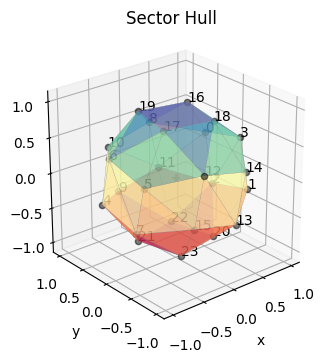

In [4]:
# steering of sectors
N_sph_sec = N_sph
sec_vecs = spa.grids.load_t_design(2*N_sph_sec if ENREC else N_sph_sec+1)  # N+1 or 2N
sec_azi, sec_zen, _ = spa.utils.cart2sph(*sec_vecs.T)
# number of sectors
J_sec = len(sec_vecs)
spa.plot.hull(spa.decoder.get_hull(*sec_vecs.T), title="Sector Hull")
plt.gcf().set_size_inches(3.3, 3.5)
#plt.savefig('figs/hull.pdf')

In [5]:
if pattern.lower() == "cardioid":
    c_n = spa.sph.cardioid_modal_weights(N_sph_sec)
elif pattern.lower() == "hypercardioid":
    c_n = spa.sph.hypercardioid_modal_weights(N_sph_sec)
elif pattern.lower() == "maxre":
    c_n = spa.sph.maxre_modal_weights(N_sph_sec, True)  # works with amplitude compensation and without!
else:
    assert()
A_sec = spa.sph.repeat_per_order(c_n) * \
            spa.sph.sh_matrix(N_sph_sec, sec_azi, sec_zen, shtype)

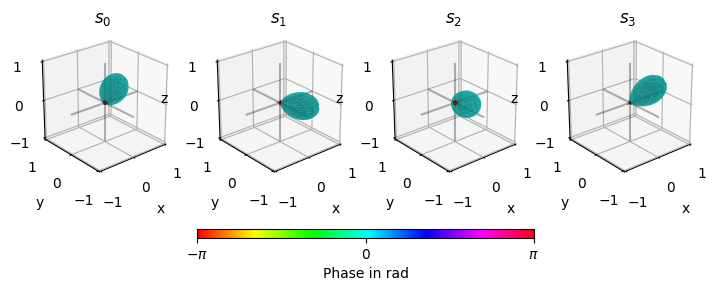

In [6]:
spa.plot.sh_coeffs_subplot([A_sec[0, :], A_sec[1, :],
                             A_sec[2, :], A_sec[3, :]],
                            titles=["$s_0$", "$s_1$", "$s_2$", "$s_3$"])
plt.gcf().set_size_inches(7, 3.5)

In [7]:
beta_a = np.sqrt(4*np.pi)/ (A_sec[0, 0] * J_sec)
beta_e = 1/ (A_sec[0, :].conj()@A_sec[0, :]/np.sqrt(4*np.pi) * J_sec/np.sqrt(4*np.pi))

In [8]:
# INPUT
Omega_in = np.c_[0, 0]
N_sph_in = N_sph
in_nm = spa.sph.sh_matrix(N_sph_in, Omega_in[:, 0], Omega_in[:, 1], shtype).conj()
in_nm = spa.sph.repeat_per_order(spa.sph.cardioid_modal_weights(N_sph_in)) * in_nm  # make cardioid
in_nm += spa.sph.sh_matrix(N_sph_in, Omega_in[:, 0]+np.pi/2, Omega_in[:, 1]+\
                           np.pi/2, shtype).conj()  # add another

print(in_nm)

[[ 1.16832172e+00  4.88602512e-01  9.20994037e-01  2.99182751e-17
   6.68992969e-17 -0.00000000e+00  8.09411645e-02  0.00000000e+00
  -5.46274215e-01 -5.90043590e-01  0.00000000e+00 -4.57045799e-01
   6.69924586e-02 -2.79859838e-17  0.00000000e+00 -1.08389249e-16]]


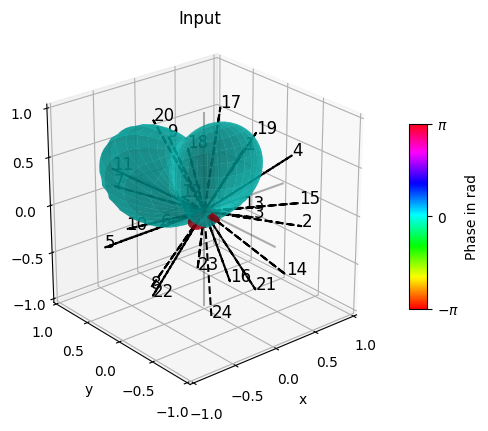

In [9]:
fig = plt.figure()
spa.plot.sh_coeffs(in_nm, title="Input", fig=fig)
ax = fig.gca()
ax.plot(np.insert(sec_vecs[:, 0], np.arange(J_sec), np.zeros(J_sec)),
           np.insert(sec_vecs[:, 1], np.arange(J_sec), np.zeros(J_sec)), 
           np.insert(sec_vecs[:, 2], np.arange(J_sec), np.zeros(J_sec)),
           color='black', linestyle='dashed')
for s, co in enumerate(sec_vecs):
    ax.text(co[0], co[1], co[2], s+1, zorder=1, fontsize=12)
plt.savefig('input_sec_nm.pdf')

In [10]:
# Apply sectors
delta_numSH = (N_sph_in+1)**2 - (N_sph_sec+1)**2
pw_secs_out = np.c_[A_sec, np.zeros([J_sec, delta_numSH])] @ in_nm.T
pw_secs_out = np.real_if_close(pw_secs_out)

In [11]:
fig, ax = plt.subplots(figsize=(default_figsize[0], 3/4*default_figsize[1]), constrained_layout=True)
plt.stem(np.arange(J_sec)+1, pw_secs_out)
plt.xlabel("Sec ID")
plt.grid()
plt.title("Sector Output")
plt.savefig('sector_output.pdf')

NameError: name 'default_figsize' is not defined